In [41]:
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
data = pd.read_csv("ReidentificationTests.csv")

In [43]:
from Utils.constant import MODELS
from Utils.constant import PLACES

def filterData(df: pd.DataFrame, query: str) -> pd.DataFrame:
    return df.query(query, inplace = False)

def stringToLst(string: str) -> list:
    return list(
        map( lambda x: float(x)*100, string.split(","))
    )

def displayCMC(df: pd.DataFrame, title: str):
    print(title)
    probe_places = 'Ayagaures'
    gallery_places = 'PresaDeHornos'
    print("[ ### Probe: %s - Gallery: %s  ###]" %(probe_places, gallery_places))
    for model in MODELS:
        df_model = filterData(df,
        'Identification_Model == "%s" and Probe_place == "%s" '
        'and Gallery_place == "%s"' % (model, probe_places, gallery_places))
        for index in range(len(df_model)):
            colum: pd.DataFrame = df.iloc[index]
            label: str = colum['Metric']
            cmc = stringToLst(colum["Values"])
            plt.plot(cmc, label = label)
            plt.xlabel("Posiciones de la calificación")
            plt.ylabel("Precisión (%)")
            plt.grid(True)
            plt.legend(loc='lower right')
            plt.title("model: %s | Probe: %s - Gallery: %s" %(model, probe_places, gallery_places))
        plt.show()
        print(model)
        print(df_model[['Metric', 'mAPtop1', 'mAPtop5']])

def plotCMC(df, query, title):
    dataFilter = filterData(df, query)
    displayCMC(dataFilter, title)

## RetinaFace

RetinaFace
[ ### Probe: Ayagaures - Gallery: PresaDeHornos  ###]
VGG-Face
          Metric   mAPtop1   mAPtop5
30        cosine  0.009534  0.009534
31     euclidean  0.011960  0.011960
32  euclidean_l2  0.010262  0.010262
Facenet
          Metric   mAPtop1   mAPtop5
33        cosine  0.015745  0.017710
34     euclidean  0.012409  0.012409
35  euclidean_l2  0.017382  0.019347
OpenFace
          Metric   mAPtop1   mAPtop5
36        cosine  0.002183  0.002183
37     euclidean  0.015429  0.017613
38  euclidean_l2  0.015429  0.017613


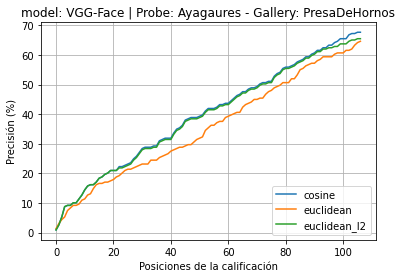

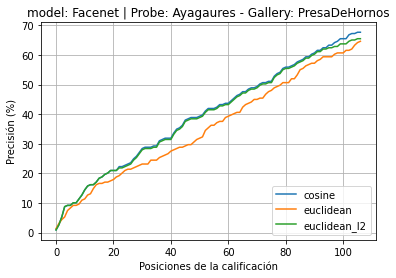

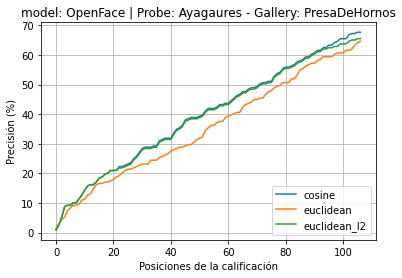

In [44]:
plotCMC(data, 'Face_Model == "retinaface" and Heuristics == "none"', "RetinaFace")

RetinaFace + recorte
[ ### Probe: Ayagaures - Gallery: PresaDeHornos  ###]
VGG-Face
          Metric   mAPtop1   mAPtop5
39        cosine  0.008041  0.008041
40     euclidean  0.017203  0.017203
41  euclidean_l2  0.009503  0.009503
Facenet
          Metric   mAPtop1   mAPtop5
42        cosine  0.014888  0.018835
43     euclidean  0.011404  0.011404
44  euclidean_l2  0.015984  0.019932
OpenFace
          Metric   mAPtop1   mAPtop5
45        cosine  0.004386  0.004386
46     euclidean  0.004386  0.004386
47  euclidean_l2  0.004386  0.004386


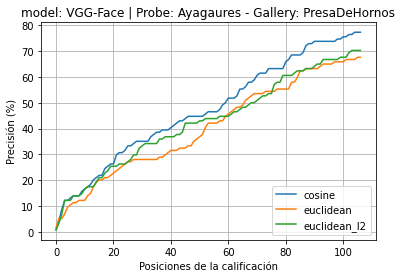

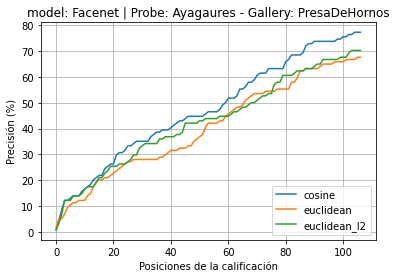

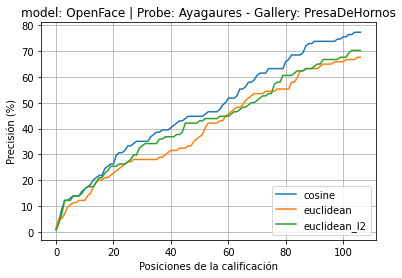

In [45]:
plotCMC(data, 'Face_Model == "retinaface" and Heuristics == "dimension"', "RetinaFace + recorte")

## Img2pose

In [46]:
plotCMC(data, 'Face_Model == "img2pose" and Heuristics == "none"', "Img2pose")

Img2pose
[ ### Probe: Ayagaures - Gallery: PresaDeHornos  ###]
VGG-Face
Empty DataFrame
Columns: [Metric, mAPtop1, mAPtop5]
Index: []
Facenet
Empty DataFrame
Columns: [Metric, mAPtop1, mAPtop5]
Index: []
OpenFace
Empty DataFrame
Columns: [Metric, mAPtop1, mAPtop5]
Index: []


In [47]:
plotCMC(data, 'Face_Model == "img2pose" and Heuristics == "dimension"', "Img2pose + recorte de imagenes")

Img2pose + recorte de imagenes
[ ### Probe: Ayagaures - Gallery: PresaDeHornos  ###]
VGG-Face
Empty DataFrame
Columns: [Metric, mAPtop1, mAPtop5]
Index: []
Facenet
Empty DataFrame
Columns: [Metric, mAPtop1, mAPtop5]
Index: []
OpenFace
Empty DataFrame
Columns: [Metric, mAPtop1, mAPtop5]
Index: []


In [48]:
from sklearn.metrics import average_precision_score

def calculateAveragePrecision(dorsalList: list, query: int) -> tuple:
        averagePrecision = []
        count = 0
        print(dorsalList)
        for index, dorsal in enumerate(dorsalList):
            if dorsal == query:
                count += 1
                averagePrecision.append(count / (index + 1))
            else:
                averagePrecision.append(0)

        return averagePrecision[0], sum(averagePrecision)

dorsal = 1
dorsalList = [1,0,1,2,2,3,2,1,4,5,6,7]
countTP = 1 / dorsalList.count(dorsal)
res = calculateAveragePrecision(dorsalList[0:5], dorsal)
print(countTP * res[0])
print(countTP * res[1])


print(average_precision_score())

[1, 0, 1, 2, 2]
0.3333333333333333
0.5555555555555555


TypeError: average_precision_score() missing 2 required positional arguments: 'y_true' and 'y_score'

In [ ]:
import pickle
import numpy as np
from sklearn.manifold import TSNE
from Utils.fileUtils import getNumber
import os

def TSNE_plot(data, classes):
  X_embedded = TSNE(n_components=2).fit_transform(data)
  plt.scatter(X_embedded[:,0], X_embedded[:,1], c = classes)
  plt.show()

with open('../TGC_places/PresaDeHornos/representations_vgg_face.pkl', 'rb') as f:
    data = pickle.load(f)
embedding = np.array([a[1]  for a in data])
runners = [getNumber(os.path.basename(a[0])) for a in data]
TSNE_plot(embedding, runners)